In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

path = r"2025-4-12公众号Python机器学习AI.xlsx"
df = pd.read_excel(path)
df

,CEC(wt%),HEC(wt%),LC(wt%),AC(wt%),FCC(wt%),VMC(wt%),CC(wt%),HC(wt%),NC(wt%),OC(wt%),HTT(℃),HR(℃/min),RT (min),yield(wt%)
0,5.65,2.99,1.47,4.67,14.74,80.59,44.73,7.01,2.55,0.44,430,15,80,43.67
1,86.83,88.21,87.77,14.83,13.32,71.85,48.26,7.02,1.24,0.56,430,15,80,46.78
2,10.10,17.00,27.00,3.98,19.61,76.42,46.44,6.36,0.91,0.38,780,15,110,45.30
3,40.00,19.01,23.00,13.46,16.44,70.10,48.00,6.82,0.38,0.27,730,15,110,29.65
4,15.00,20.00,30.00,1.00,16.20,82.81,48.22,6.13,0.30,0.00,760,15,55,28.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,40.00,22.50,22.50,25.24,8.40,53.45,32.71,5.38,4.85,51.85,550,10,30,41.00
332,40.00,22.50,22.50,25.24,8.40,53.45,32.71,5.38,4.85,51.85,550,10,30,40.00
333,40.00,22.50,22.50,25.24,8.40,53.45,32.71,5.38,4.85,51.85,550,10,30,38.00
334,40.00,22.50,22.50,25.24,8.40,53.45,32.71,5.38,4.85,51.85,550,10,30,37.50


In [7]:
from sklearn.model_selection import train_test_split
# 划分特征和目标变量
X = df.drop(['yield(wt%)'], axis=1)
y = df['yield(wt%)']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [8]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor

# 1. SVR (支持向量回归) 
svr_model = SVR(C=5000, degree=3, epsilon=0.4, kernel='rbf')
svr_model.fit(X_train, y_train)

# 2. GBDT (梯度提升树)
gbdt_model = GradientBoostingRegressor()
gbdt_model.fit(X_train, y_train)

# 3. RF (随机森林回归)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 4. LM-BPNN (线性模型与反向传播神经网络的组合)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp_model.fit(X_train, y_train)

# 5. XGBoost (极端梯度提升)
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# 6. Decision Tree Regressor (决策树回归)
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# 定义计算指标的函数
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    MAE_train = mean_absolute_error(y_train, y_train_pred)
    MAE_test = mean_absolute_error(y_test, y_test_pred)

    return {
        'R^2': (R2_train, R2_test),
        'RMSE': (RMSE_train, RMSE_test),
        'MSE': (MSE_train, MSE_test),
        'MAE': (MAE_train, MAE_test)
    }

# 模型列表
models = {
    'GBDT': gbdt_model,
    'SVR': svr_model,
    'RF': rf_model,
    'LM-BPNN': mlp_model,
    'XGBoost': xgb_model,
    'DT': dt_model  # 替换为决策树模型
}

# 创建空的字典来存储训练和测试指标
train_metrics = {}
test_metrics = {}

# 遍历所有模型并计算评价指标
for model_name, model in models.items():
    metrics = calculate_metrics(model, X_train, X_test, y_train, y_test)
    train_metrics[model_name] = [metrics['R^2'][0], metrics['RMSE'][0], metrics['MSE'][0], metrics['MAE'][0]]
    test_metrics[model_name] = [metrics['R^2'][1], metrics['RMSE'][1], metrics['MSE'][1], metrics['MAE'][1]]

# 定义评价指标
metrics = ['R^2', 'RMSE', 'MSE', 'MAE']
train_metrics_df = pd.DataFrame(train_metrics, index=metrics)
test_metrics_df = pd.DataFrame(test_metrics, index=metrics)
train_metrics_df

,GBDT,SVR,RF,LM-BPNN,XGBoost,DT
R^2,0.942556,0.801997,0.946572,0.791479,0.961433,0.961443
RMSE,3.669629,6.812949,3.539023,6.991564,3.006824,3.006434
MSE,13.466174,46.416278,12.524687,48.881964,9.040991,9.038648
MAE,2.370847,4.521108,2.103988,5.147306,1.132667,1.107236


In [10]:
train_R2 = train_metrics_df.iloc[0, :].tolist()
test_R2 = test_metrics_df.iloc[0, :].tolist()
models = train_metrics_df.columns.tolist()

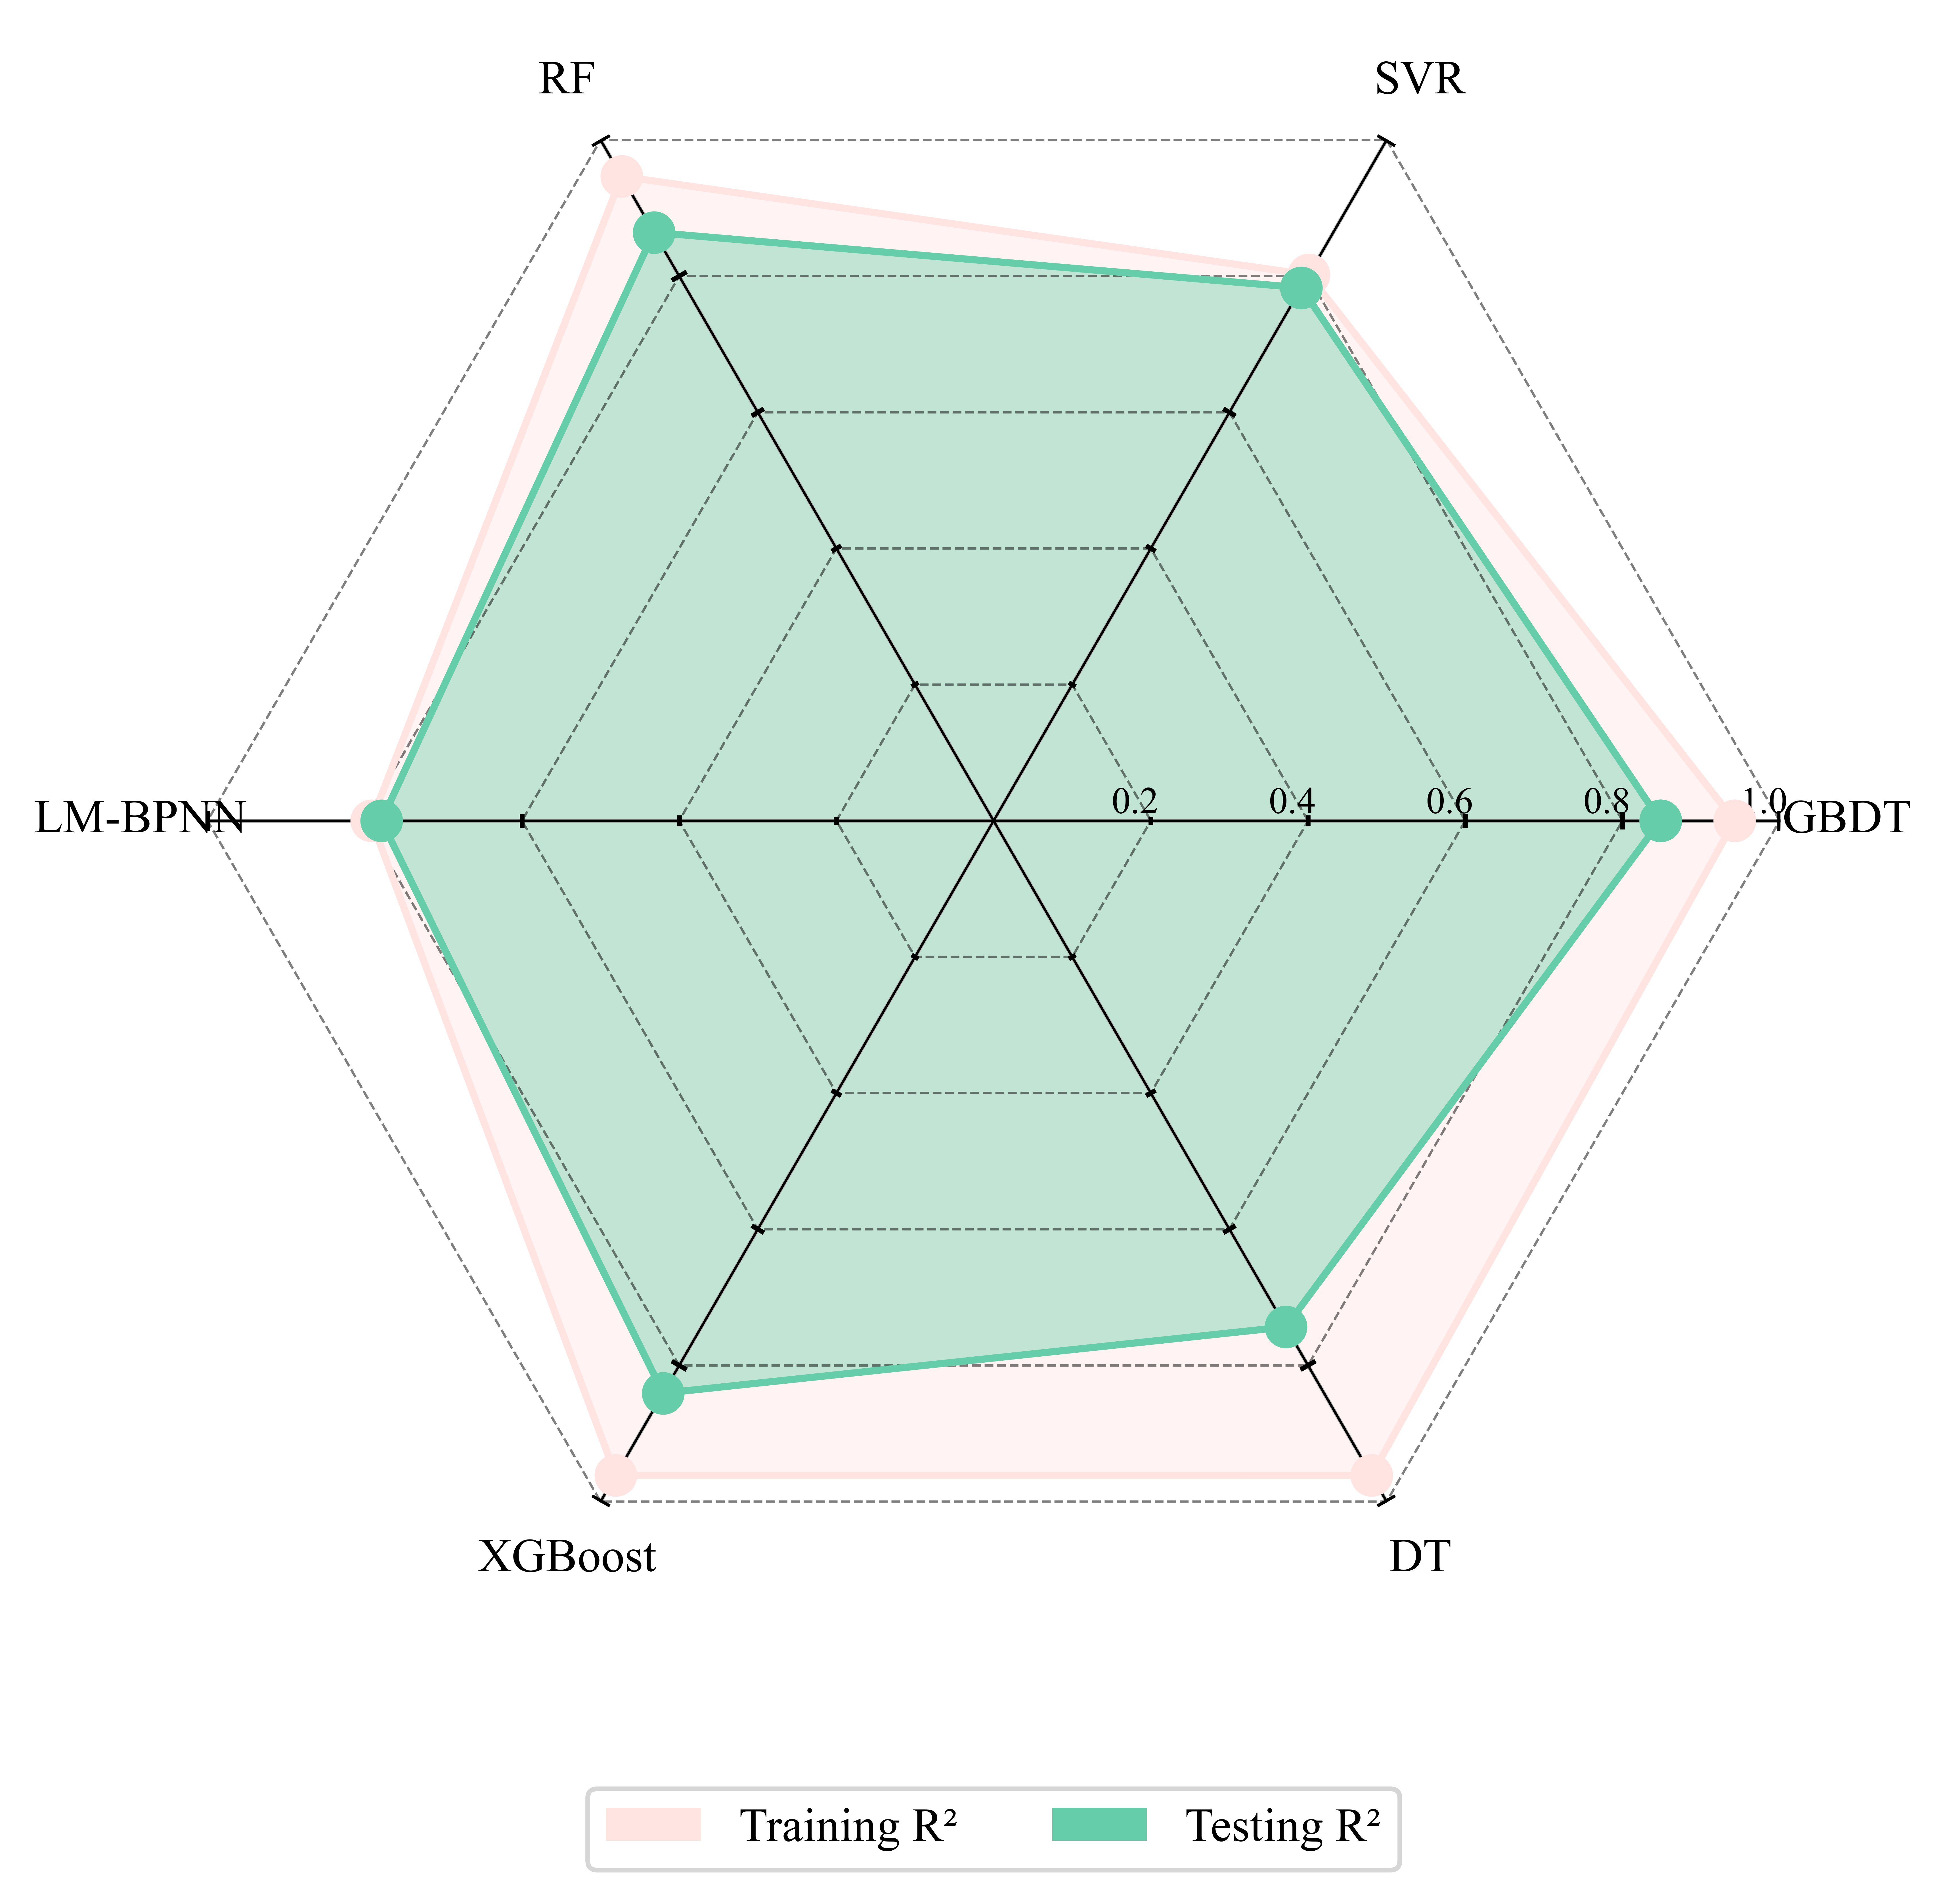

In [11]:
from matplotlib.patches import Patch
# 计算角度
angles = np.linspace(0, 2 * np.pi, len(models), endpoint=False).tolist()
# 数据闭合，使得雷达图形成闭环
train_R2 += train_R2[:1]
test_R2 += test_R2[:1]  # 添加test_R2的最后一个值，确保雷达图闭合
# 角度闭合，使得雷达图形成闭环
angles += angles[:1]

# 设置图形的极坐标，并定义半径范围为 [0, 1]，确保不会超出边框
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=1200)

# 调整半径范围
ax.set_ylim(0, 1.001)

# 绘制训练集数据的填充和线条
train_line, = ax.plot(angles, train_R2, color='#FFE4E1', marker='o', markersize=8, linestyle='-', zorder=5)
ax.fill(angles, train_R2, color='#FFE4E1', alpha=0.4)

# 绘制测试集数据的填充和线条
test_line, = ax.plot(angles, test_R2, color='#66CDAA', marker='o', markersize=8, linestyle='-', zorder=5)
ax.fill(angles, test_R2, color='#66CDAA', alpha=0.4)

# 设置空的y轴标签
ax.set_yticklabels([])
# 设置x轴的角度刻度
ax.set_xticks(angles[:-1])
# 设置x轴的标签
ax.set_xticklabels(models)

# 隐藏默认的圆形网格
ax.yaxis.grid(False)
# 隐藏极坐标的圆形边框
ax.spines['polar'].set_visible(False)

# 使用虚线绘制八边形的环
num_vars = len(models)
for i in range(1, 6):
    ax.plot(angles, [i * 0.2] * (num_vars + 1), '--', lw=0.5, color='black', alpha=0.5)

# 使用实线绘制由中心点发出的线，并在圆形边框截止
for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1], lw=0.5, color='black')
    for i in range(1, 6):
        # 计算半径
        radius = i * 0.2
        # 在每个八边形与实线相交处画一个短横杠
        ax.plot([angle - 0.01, angle + 0.01], [radius, radius], lw=1, color='black')

# 手动调整 "Complete revascularisation" 标签的位置和格式
angle_label = angles[4]
# 添加刻度标签在直线上的位置，并向上稍微调整位置
r_values = np.linspace(0.2, 1.0, 5)
for r_value in r_values:
    ax.text(angles[0], r_value-0.02, f'{r_value:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='black')

# 创建自定义的图例
legend_elements = [
    Patch(facecolor='#FFE4E1', edgecolor=None, label='Training R²'),
    Patch(facecolor='#66CDAA', edgecolor=None, label='Testing R²')
]

# 添加图例
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)
plt.savefig("Patch.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()